In [1]:
import numpy as np
import awkward as ak
import uproot
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
root_file_dir= '~/Desktop/ROOT_files/'
file= uproot.open(root_file_dir + 'flat_caf_0-833995dc-14a2-47e7-9a95-91e25102b7ef.root:recTree;29')

In [3]:
file.keys()

['rec.crt_hits..length',
 'rec.crt_hits.pe',
 'rec.crt_hits.plane',
 'rec.crt_hits.position.x',
 'rec.crt_hits.position.y',
 'rec.crt_hits.position.z',
 'rec.crt_hits.position_err.x',
 'rec.crt_hits.position_err.y',
 'rec.crt_hits.position_err.z',
 'rec.crt_hits.t0',
 'rec.crt_hits.t1',
 'rec.crt_hits.time',
 'rec.crt_tracks..length',
 'rec.crt_tracks.hita.pe',
 'rec.crt_tracks.hita.plane',
 'rec.crt_tracks.hita.position.x',
 'rec.crt_tracks.hita.position.y',
 'rec.crt_tracks.hita.position.z',
 'rec.crt_tracks.hita.position_err.x',
 'rec.crt_tracks.hita.position_err.y',
 'rec.crt_tracks.hita.position_err.z',
 'rec.crt_tracks.hita.t0',
 'rec.crt_tracks.hita.t1',
 'rec.crt_tracks.hita.time',
 'rec.crt_tracks.hitb.pe',
 'rec.crt_tracks.hitb.plane',
 'rec.crt_tracks.hitb.position.x',
 'rec.crt_tracks.hitb.position.y',
 'rec.crt_tracks.hitb.position.z',
 'rec.crt_tracks.hitb.position_err.x',
 'rec.crt_tracks.hitb.position_err.y',
 'rec.crt_tracks.hitb.position_err.z',
 'rec.crt_tracks.hitb.

In [4]:
def get_cut(start, end):
    cut_xf= (np.absolute(end['xf'])<200) 
    cut_yf= (np.absolute(end['yf'])<200)
    cut_zf0= (end['zf'])>0
    cut_zf1= (end['zf'])<500

    cut_x0= (np.absolute(start['x0'])<200) 
    cut_y0= (np.absolute(start['y0'])<200)
    cut_z00= (np.absolute(start['z0'])>0)
    cut_z01= (np.absolute(start['z0'])<500)

    cut_full= cut_xf & cut_yf & cut_zf0 & cut_zf1 & cut_x0 & cut_y0 & cut_z00 & cut_z01
    cut= np.full(ak.num(cut_full, axis=0), True)

    for i in range(ak.num(cut_full, axis=0)):
        for j in range(ak.num(cut_full)[i]):
            if cut_full[i][j]== False:
                cut[i]= False

    return cut

In [5]:
rr= file['rec.reco.trk.calo.2.points.rr'].array()
dedx= file['rec.reco.trk.calo.2.points.dedx'].array()
start= file.arrays(['x0','y0','z0'], aliases={'x0':'rec.reco.trk.start.x', 
                                     'y0':'rec.reco.trk.start.y',
                                     'z0':'rec.reco.trk.start.z'})

end= file.arrays(['xf','yf','zf'], aliases={'xf':'rec.reco.trk.end.x', 
                                    'yf':'rec.reco.trk.end.y',
                                     'zf':'rec.reco.trk.end.z'})

cut_xf= (np.absolute(end['xf'])<200) 
cut_yf= (np.absolute(end['yf'])<200)
cut_zf0= (end['zf'])>0
cut_zf1= (end['zf'])<500

cut_x0= (np.absolute(start['x0'])<200) 
cut_y0= (np.absolute(start['y0'])<200)
cut_z00= (np.absolute(start['z0'])>0)
cut_z01= (np.absolute(start['z0'])<500)
print(cut_xf[1][2:])
print(cut_yf[1][2:])

[True, True, True, True, True, True, True, False, True, True]
[True, True, True, False, False, False, False, True, True, True]


In [6]:
cut_full= cut_xf & cut_yf & cut_zf0 & cut_zf1 & cut_x0 & cut_y0 & cut_z00 & cut_z01
cut= np.full(ak.num(cut_full, axis=0), True)

for i in range(ak.num(cut_full, axis=0)):
    for j in range(ak.num(cut_full)[i]):
        if cut_full[i][j]== False:
            cut[i]= False

(0.0, 20.0)

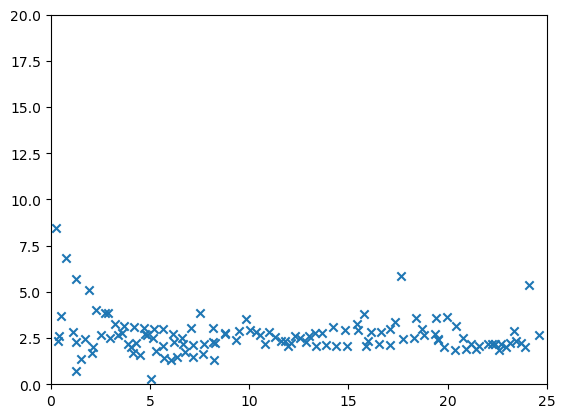

In [7]:
rr= file['rec.reco.trk.calo.2.points.rr'].array()
dedx= file['rec.reco.trk.calo.2.points.dedx'].array() 

rr_flat= ak.flatten(rr[cut]).to_numpy()
dedx_flat= ak.flatten(dedx[cut]).to_numpy()

remove= np.where((dedx_flat>50)|(rr_flat>25))
rr_flat= np.delete(rr_flat, remove)
dedx_flat= np.delete(dedx_flat, remove)

i=140
plt.scatter(rr[i],dedx[i], marker='x')
plt.xlim((0,25))
plt.ylim((0,20))



[[3. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 

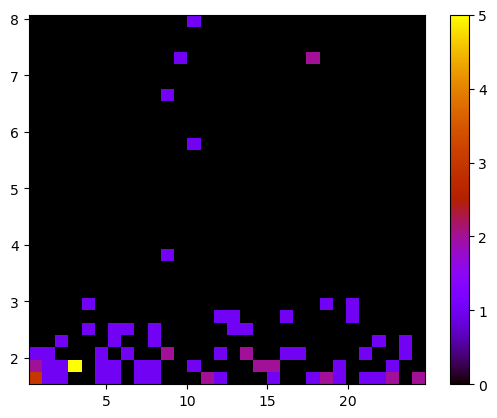

In [8]:
h,_,_,_= plt.hist2d(rr_flat, dedx_flat, bins=[30,30], cmap= cm.gnuplot)
plt.colorbar()
print(h)

In [9]:
file1= uproot.open(root_file_dir + 'flat_caf_1-1637ea75-449f-467f-abd7-9e2f4f9710a7.root:recTree;31')

In [10]:
file1['rec.reco.trk.truth.p.end.x'].array()

<Array [[121, -26.8, 201, ... 0.937, 98.1]] type='4929 * var * float32'>

In [11]:
file1['rec.reco.trk.truth.p.start.x'].array()

<Array [[182, -39.2, 12.7, ... -190, 193, 201]] type='4929 * var * float32'>

In [12]:
file1['rec.reco.trk.calo.0.ke'].array()

<Array [[502, 802, 692, 436, ... 342, 182, 37]] type='4929 * var * float32'>

In [13]:
file1= uproot.open(root_file_dir + 'flat_caf_1-1637ea75-449f-467f-abd7-9e2f4f9710a7.root:recTree;31')
rr= ak.flatten(file1['rec.reco.trk.calo.2.points.rr'].array()).to_numpy()[:]
dedx= ak.flatten(file1['rec.reco.trk.calo.2.points.dedx'].array()).to_numpy()[:]



rr= np.concatenate((rr_1, rr_2, rr_3), axis= None) 
dedx= np.concatenate((dedx_1, dedx_2, dedx_3), axis=None) 

remove= np.where((dedx>50)|(rr>25) | (dedx<0))
rr= np.delete(rr, remove)
dedx= np.delete(dedx, remove)

h,_,_,_= plt.hist2d(rr, dedx, bins=[100,100], cmap= cm.gnuplot)
plt.colorbar()
print(h)

NameError: name 'rr_1' is not defined

(array([  61.,  150.,  145.,  125.,  131.,  134.,  112.,  114.,  102.,
         138.,  112.,  102.,   84.,  109.,   84.,  108.,  109.,  112.,
         106.,   86.,   80.,   91.,   76.,  107.,   93.,   94.,   96.,
          76.,   99.,   88.,   90.,   97.,   82.,   99.,   78.,   84.,
          90.,   95.,   89.,   90.,   89.,   93.,   93.,   95.,  105.,
         104.,   66.,   98.,   97.,  112.,   88.,   92.,   92.,   83.,
          95.,   99.,   88.,   87.,   77.,   91.,   84.,  101.,   84.,
          76.,  106.,   84.,  101.,   97.,   91.,   87.,   87.,  104.,
          92.,   90.,   81.,   95.,   89.,   89.,   87.,   97.,   99.,
          74.,   99.,   83.,   82.,   96.,   79.,   83.,   89.,   82.,
          98.,   78.,   81.,   82.,   92.,   86.,   98.,   74.,   80.,
         101.,   80.,  101.,   93.,   81.,   84.,   83.,   84.,   94.,
         107.,  105.,   78.,   84.,   83.,   92.,  103.,   75.,   93.,
          81.,   84.,   87.,   88.,   97.,   80.,   87.,   98.,   92.,
      

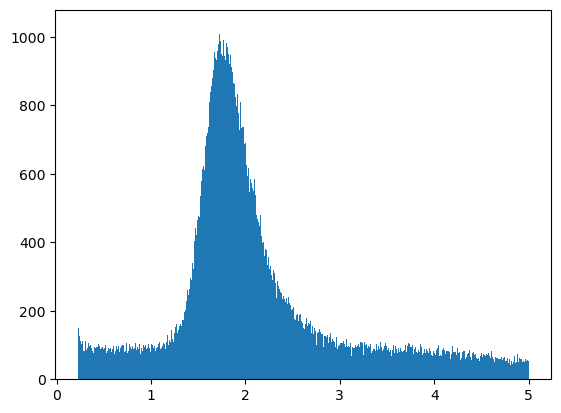

In [ ]:
remove= np.where((dedx>50)|(rr>25) | (rr>5))
rr= np.delete(rr, remove)
dedx= np.delete(dedx, remove)
plt.hist(dedx[dedx<5], bins= 1000)

[[3.122e+03 3.771e+03 4.221e+03 ... 0.000e+00 0.000e+00 1.000e+00]
 [1.443e+03 1.340e+03 2.904e+03 ... 1.000e+00 1.000e+00 1.000e+00]
 [7.970e+02 6.680e+02 2.769e+03 ... 1.000e+00 2.000e+00 2.000e+00]
 ...
 [1.580e+02 1.140e+02 1.999e+03 ... 1.000e+00 0.000e+00 0.000e+00]
 [1.510e+02 1.220e+02 1.924e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.550e+02 1.140e+02 1.982e+03 ... 0.000e+00 0.000e+00 0.000e+00]]


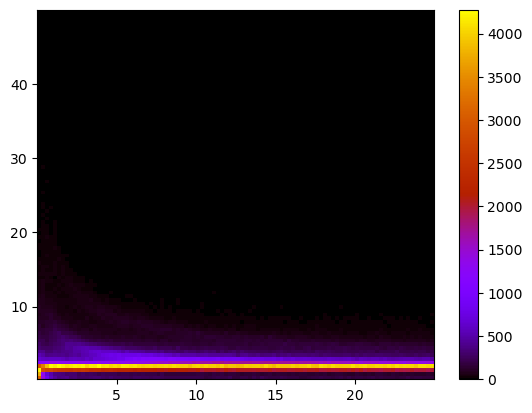

In [ ]:
file2= uproot.open(root_file_dir + 'flat_caf_2-16432aaf-a139-4cb0-8c09-26f5af8c457f.root:recTree;31')
rr_1= ak.flatten(file2['rec.reco.trk.calo.0.points.rr'].array()).to_numpy()[:]
rr_2= ak.flatten(file2['rec.reco.trk.calo.1.points.rr'].array()).to_numpy()[:]
rr_3= ak.flatten(file2['rec.reco.trk.calo.2.points.rr'].array()).to_numpy()[:]
dedx_1= ak.flatten(file2['rec.reco.trk.calo.0.points.dedx'].array()).to_numpy()[:]
dedx_2= ak.flatten(file2['rec.reco.trk.calo.1.points.dedx'].array()).to_numpy()[:]
dedx_3= ak.flatten(file2['rec.reco.trk.calo.2.points.dedx'].array()).to_numpy()[:]

rr= np.concatenate((rr_1, rr_2, rr_3), axis= None) 
dedx= np.concatenate((dedx_1, dedx_2, dedx_3), axis=None) 

remove= np.where((dedx>50)|(rr>25))
rr= np.delete(rr, remove)
dedx= np.delete(dedx, remove)

h,_,_,_= plt.hist2d(rr, dedx, bins=[100,100], cmap= cm.gnuplot, cmax= 40)
plt.colorbar()
print(h)

[[2.843e+03 3.624e+03 3.818e+03 ... 0.000e+00 0.000e+00 1.000e+00]
 [1.400e+03 1.344e+03 2.947e+03 ... 0.000e+00 0.000e+00 1.000e+00]
 [8.190e+02 6.480e+02 2.532e+03 ... 1.000e+00 2.000e+00 5.000e+00]
 ...
 [1.470e+02 1.030e+02 1.887e+03 ... 0.000e+00 0.000e+00 1.000e+00]
 [1.600e+02 1.120e+02 1.886e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.350e+02 1.280e+02 1.879e+03 ... 0.000e+00 0.000e+00 0.000e+00]]


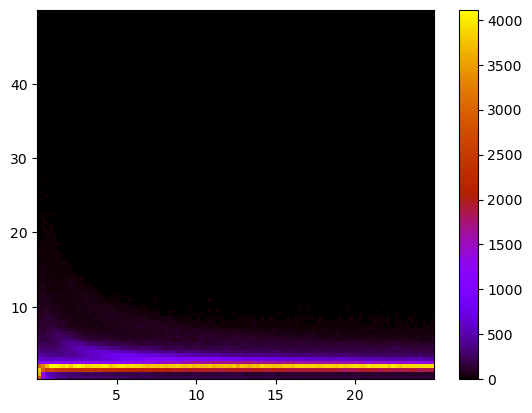

In [ ]:
file3= uproot.open(root_file_dir + 'flat_caf_3-1ffa5d5d-a703-4c89-be04-dd5e6d458981.root:recTree;31')
rr_1= ak.flatten(file3['rec.reco.trk.calo.0.points.rr'].array()).to_numpy()[:]
rr_2= ak.flatten(file3['rec.reco.trk.calo.1.points.rr'].array()).to_numpy()[:]
rr_3= ak.flatten(file3['rec.reco.trk.calo.2.points.rr'].array()).to_numpy()[:]
dedx_1= ak.flatten(file3['rec.reco.trk.calo.0.points.dedx'].array()).to_numpy()[:]
dedx_2= ak.flatten(file3['rec.reco.trk.calo.1.points.dedx'].array()).to_numpy()[:]
dedx_3= ak.flatten(file3['rec.reco.trk.calo.2.points.dedx'].array()).to_numpy()[:]

rr= np.concatenate((rr_1, rr_2, rr_3), axis= None) 
dedx= np.concatenate((dedx_1, dedx_2, dedx_3), axis=None) 

remove= np.where((dedx>50)|(rr>25))
rr= np.delete(rr, remove)
dedx= np.delete(dedx, remove)

h,_,_,_= plt.hist2d(rr, dedx, bins=[100,100], cmap= cm.gnuplot)
plt.colorbar()
print(h)

In [ ]:
file4= uproot.open(root_file_dir + 'flat_caf_4-d0f08994-a5a3-4420-8600-616832f5adbb.root:recTree;31')
file4['rec.reco.trk.calo.0.points.rr'].all_members

{'@fUniqueID': 0,
 '@fBits': 54525952,
 'fName': 'rec.reco.trk.calo.0.points.rr',
 'fTitle': 'rec.reco.trk.calo.0.points.rr[rec.reco.trk.calo.0.points..totarraysize]/F',
 'fFillColor': 0,
 'fFillStyle': 1001,
 'fCompress': 401,
 'fBasketSize': 177152,
 'fEntryOffsetLen': 256,
 'fWriteBasket': 33,
 'fEntryNumber': 5084,
 'fIOFeatures': <ROOT::TIOFeatures at 0x7f0d4617ab20>,
 'fOffset': 0,
 'fMaxBaskets': 34,
 'fSplitLevel': 0,
 'fEntries': 5084,
 'fFirstEntry': 0,
 'fTotBytes': 1911311,
 'fZipBytes': 1911311,
 'fBranches': <TObjArray of 0 items at 0x7f0d4617ab50>,
 'fLeaves': <TObjArray of 1 items at 0x7f0d4617acd0>,
 'fBasketBytes': array([31807, 31871,  6147, 61815, 60595, 67875, 68643, 59983, 66991,
        61687, 56535, 55559, 66939, 69395, 65699, 56195, 58295, 72291,
        54199, 64579, 58555, 62507, 56455, 54451, 57019, 59887, 54135,
        64059, 65991, 66271, 59135, 57819, 57927,     0], dtype=int32),
 'fBasketEntry': array([   0,   78,  148,  164,  328,  492,  656,  820,  98

[[3.024e+03 3.828e+03 3.992e+03 ... 0.000e+00 4.000e+00 0.000e+00]
 [1.492e+03 1.333e+03 3.021e+03 ... 1.000e+00 3.000e+00 1.000e+00]
 [7.550e+02 6.980e+02 2.653e+03 ... 1.000e+00 0.000e+00 1.000e+00]
 ...
 [1.680e+02 1.130e+02 1.926e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.540e+02 1.200e+02 1.996e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.540e+02 9.900e+01 1.992e+03 ... 0.000e+00 0.000e+00 0.000e+00]]


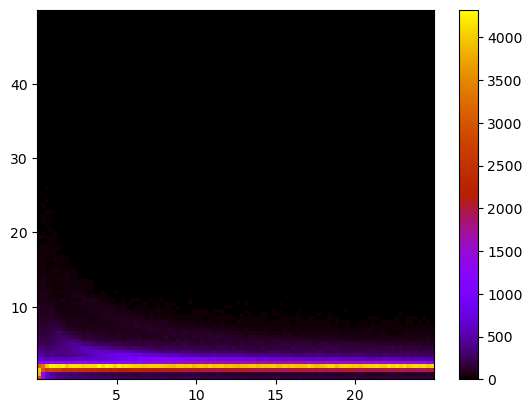

In [ ]:
file4= uproot.open(root_file_dir + 'flat_caf_4-d0f08994-a5a3-4420-8600-616832f5adbb.root:recTree;31')
rr_1= ak.flatten(file4['rec.reco.trk.calo.0.points.rr'].array()).to_numpy()[:]
rr_2= ak.flatten(file4['rec.reco.trk.calo.1.points.rr'].array()).to_numpy()[:]
rr_3= ak.flatten(file4['rec.reco.trk.calo.2.points.rr'].array()).to_numpy()[:]
dedx_1= ak.flatten(file4['rec.reco.trk.calo.0.points.dedx'].array()).to_numpy()[:]
dedx_2= ak.flatten(file4['rec.reco.trk.calo.1.points.dedx'].array()).to_numpy()[:]
dedx_3= ak.flatten(file4['rec.reco.trk.calo.2.points.dedx'].array()).to_numpy()[:]

rr= np.concatenate((rr_1, rr_2, rr_3), axis= None) 
dedx= np.concatenate((dedx_1, dedx_2, dedx_3), axis=None) 

remove= np.where((dedx>50)|(rr>25))
rr= np.delete(rr, remove)
dedx= np.delete(dedx, remove)

h,_,_,_= plt.hist2d(rr, dedx, bins=[100,100], cmap= cm.gnuplot)
plt.colorbar()
print(h)

(array([6368., 4959., 4454., 4203., 4082., 4056., 3981., 3960., 3911.,
        3827., 3846., 3862., 3829., 3754., 3748., 3750., 3739., 3733.,
        3686., 3642., 3599., 3659., 3581., 3617., 3504., 3556., 3500.,
        3566., 3421., 3504., 3370., 3462., 3366., 3330., 3311., 3335.,
        3317., 3238., 3373., 3274., 3227., 3298., 3275., 3278., 3191.,
        3196., 3257., 3182., 3145., 3174., 3172., 3072., 3171., 3026.,
        3073., 3082., 3062., 3107., 3019., 3027., 3084., 2970., 3024.,
        3024., 2964., 3052., 2964., 3001., 2945., 2903., 3000., 2871.,
        2990., 2860., 2947.,  129.,  114.,  119.,  124.,  117.,  128.,
         132.,  131.,  132.,  118.,  112.,  116.,  111.,  112.,  113.,
         126.,  102.,  126.,  134.,  124.,  109.,  106.,  113.,  112.,
         120.,  116.,  101.,  125.,  112.,  101.,  110.,  112.,  102.,
         106.,   98.,  112.,  118.,  108.,  103.,  108.,  106.,   95.,
         102.,  100.,   93.,  105.,   77.,  107.,   95.,   89.,  102.,
      

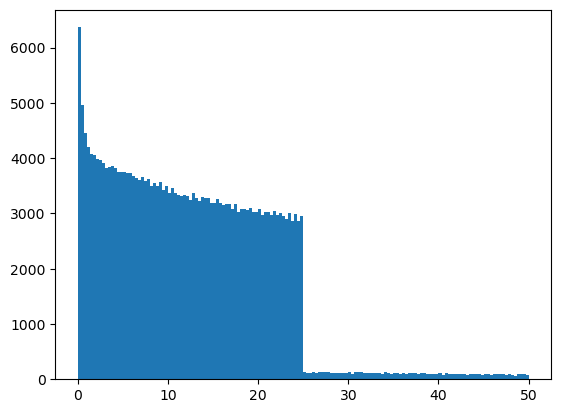

In [ ]:
a= ak.flatten(file['rec.reco.trk.calo.2.points.rr'].array())
plt.hist(a[a<50], bins= 150)

(array([ 2510.,  1765.,  1422.,  1336.,  1262.,  1096.,  1021.,   963.,
          945.,   878.,   833.,   799.,   821.,   830.,   853.,   848.,
          850.,   838.,   833.,   849.,   935.,  1031.,  1178.,  1481.,
         2081.,  3278.,  5044.,  7659., 10336., 12894., 14565., 15906.,
        15835., 15364., 13622., 12336., 10869.,  9450.,  8138.,  7129.,
         6159.,  5562.,  4930.,  4565.,  4027.,  3551.,  3321.,  2926.,
         2844.,  2624.,  2424.,  2280.,  2156.,  1906.,  1853.,  1865.,
         1738.,  1549.,  1504.,  1494.,  1398.,  1388.,  1289.,  1224.,
         1172.,  1108.,  1058.,  1110.,  1061.,  1006.,   999.,   931.,
          887.,   884.,   953.,   825.,   825.,   851.,   792.,   793.,
          750.,   761.,   713.,   722.,   672.,   689.,   620.,   575.,
          619.,   646.,   553.,   580.,   560.,   533.,   490.,   432.,
          498.,   461.,   454.,   438.,   419.,   371.,   384.,   377.,
          392.,   354.,   339.,   351.,   332.,   327.,   311., 

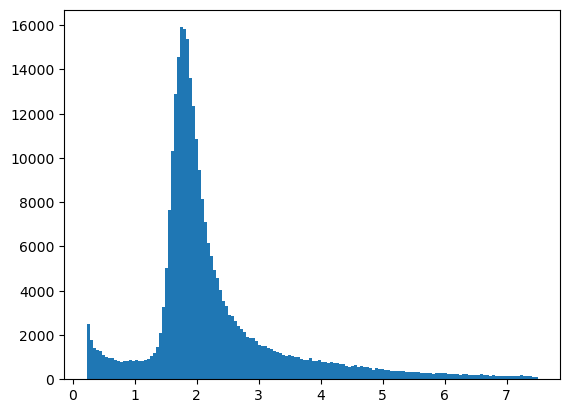

In [ ]:
a= ak.flatten(file['rec.reco.trk.calo.2.points.dedx'].array())
plt.hist(a[a<7.5], bins= 150)

(array([ 2066.,  1351.,  1111.,  1043.,   975.,   929.,   880.,   821.,
          784.,   752.,   737.,   704.,   675.,   676.,   666.,   614.,
          677.,   699.,   663.,   744.,   709.,   714.,   717.,   718.,
          760.,   827.,   854.,   979.,  1106.,  1373.,  1952.,  3027.,
         4867.,  7418.,  9882., 12651., 14891., 16137., 16406., 15817.,
        14206., 12955., 11513., 10045.,  8600.,  7255.,  6480.,  5686.,
         5178.,  4663.,  4170.,  3887.,  3377.,  3195.,  2935.,  2700.,
         2562.,  2400.,  2226.,  2081.,  2089.,  1953.,  1792.,  1786.,
         1731.,  1550.,  1594.,  1426.,  1470.,  1387.,  1358.,  1368.,
         1278.,  1258.,  1182.,  1239.,  1115.,  1133.,  1063.,  1024.,
         1023.,   975.,   928.,   914.,   873.,   861.,   801.,   780.,
          753.,   656.,   647.,   676.,   644.,   590.,   603.,   573.,
          566.,   558.,   500.,   500.,   441.,   461.,   438.,   422.,
          414.,   429.,   388.,   370.,   356.,   351.,   321., 

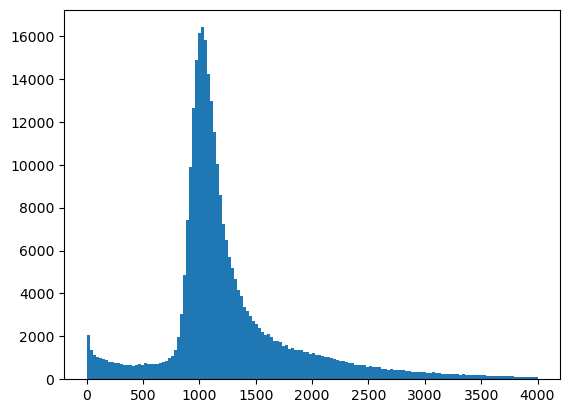

In [ ]:
a= ak.flatten(file['rec.reco.trk.calo.2.points.dqdx'].array())
plt.hist(a[a<4000], bins= 150)

(array([1.618e+03, 9.070e+02, 7.130e+02, 6.560e+02, 6.430e+02, 6.290e+02,
        6.830e+02, 7.290e+02, 6.960e+02, 7.120e+02, 7.060e+02, 6.820e+02,
        6.860e+02, 7.050e+02, 6.690e+02, 6.560e+02, 6.650e+02, 6.950e+02,
        7.010e+02, 6.490e+02, 6.560e+02, 6.620e+02, 6.330e+02, 6.150e+02,
        6.260e+02, 6.470e+02, 5.810e+02, 6.100e+02, 5.740e+02, 5.900e+02,
        5.930e+02, 5.930e+02, 5.850e+02, 5.200e+02, 5.410e+02, 5.590e+02,
        5.060e+02, 5.300e+02, 5.190e+02, 4.540e+02, 4.530e+02, 4.670e+02,
        4.330e+02, 4.390e+02, 3.900e+02, 4.000e+02, 4.200e+02, 3.610e+02,
        3.560e+02, 3.450e+02, 3.570e+02, 3.530e+02, 3.180e+02, 3.390e+02,
        2.980e+02, 3.150e+02, 2.790e+02, 2.740e+02, 3.260e+02, 2.990e+02,
        2.500e+02, 2.640e+02, 2.610e+02, 2.690e+02, 2.470e+02, 2.630e+02,
        2.260e+02, 2.490e+02, 2.500e+02, 2.740e+02, 3.000e+02, 2.960e+02,
        3.250e+02, 3.230e+02, 3.690e+02, 3.660e+02, 3.570e+02, 3.570e+02,
        3.380e+02, 3.150e+02, 2.790e+0

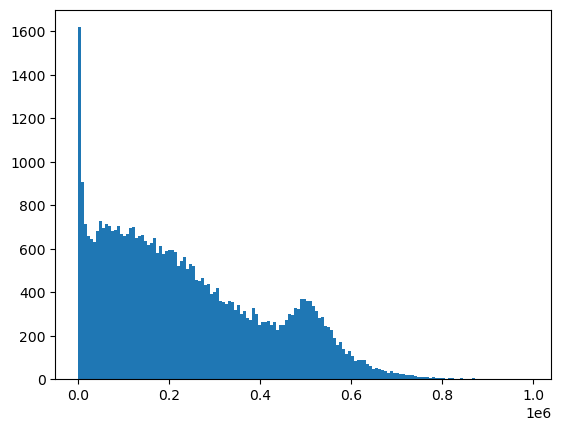

In [ ]:
a= ak.flatten(file['rec.reco.trk.calo.1.charge'].array())
plt.hist(a[a<1e6], bins= 150)

(array([1.458e+03, 2.502e+03, 3.128e+03, 3.788e+03, 4.173e+03, 4.551e+03,
        4.644e+03, 5.008e+03, 4.858e+03, 5.061e+03, 5.052e+03, 5.108e+03,
        4.890e+03, 4.831e+03, 4.690e+03, 4.547e+03, 4.429e+03, 4.233e+03,
        4.042e+03, 3.812e+03, 3.821e+03, 3.697e+03, 3.599e+03, 3.312e+03,
        3.190e+03, 3.024e+03, 2.890e+03, 2.826e+03, 2.630e+03, 2.588e+03,
        2.421e+03, 2.327e+03, 2.352e+03, 2.202e+03, 2.096e+03, 2.008e+03,
        2.010e+03, 1.952e+03, 1.851e+03, 1.759e+03, 1.687e+03, 1.573e+03,
        1.569e+03, 1.443e+03, 1.439e+03, 1.428e+03, 1.495e+03, 1.502e+03,
        1.526e+03, 1.648e+03, 1.581e+03, 1.528e+03, 1.476e+03, 1.405e+03,
        1.382e+03, 1.275e+03, 1.209e+03, 1.123e+03, 1.041e+03, 9.500e+02,
        8.180e+02, 8.170e+02, 7.160e+02, 6.930e+02, 6.510e+02, 5.850e+02,
        5.180e+02, 4.570e+02, 4.410e+02, 3.990e+02, 3.790e+02, 3.710e+02,
        3.540e+02, 3.320e+02, 3.160e+02, 2.760e+02, 2.630e+02, 2.150e+02,
        2.370e+02, 1.990e+02, 1.720e+0

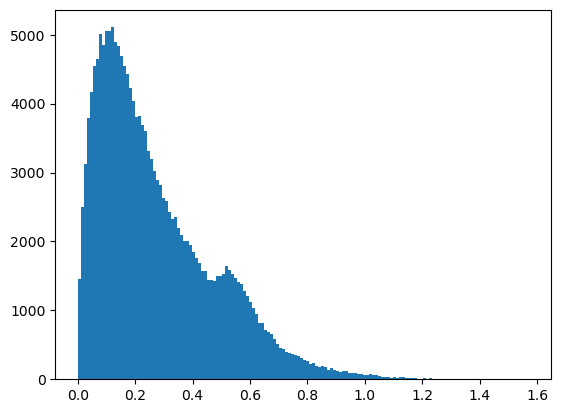

In [ ]:
a= ak.flatten(file['rec.slc.reco.shw.open_angle'].array())
plt.hist(a[a>0], bins= 150)

(array([1.1100e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.6000e+01, 8.0000e+00, 3.3000e+02, 1.0830e+03, 6.0440e+03,
        8.7220e+03, 1.2119e+04, 9.4150e+03, 7.5570e+03, 7.1840e+03,
        9.9830e+03, 5.6540e+03, 4.9620e+03, 6.1600e+03, 5.0530e+03,
        3.7230e+03, 3.2520e+03, 4.9580e+03, 3.0520e+03, 2.5390e+03,
        2.9250e+03, 2.8640e+03, 2.1730e+03, 2.00

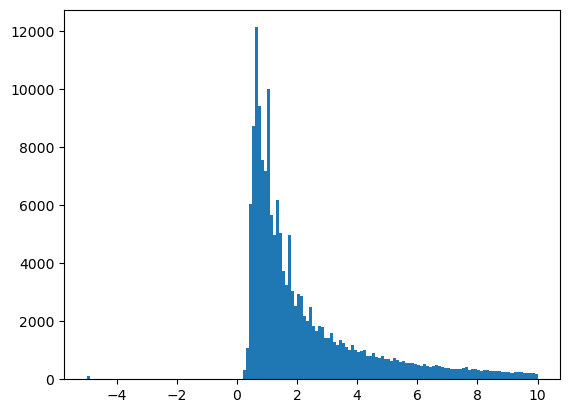

In [ ]:
a= ak.flatten(file['rec.slc.reco.shw.len'].array())
plt.hist(a[(a<10)], bins= 150)

/opt/anaconda3/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in subtract
  result = getattr(ufunc, method)(


(array([8.4181e+04, 5.5000e+01, 4.2000e+01, 1.7000e+01, 2.5000e+01,
        9.0000e+00, 1.7000e+01, 2.2600e+02, 1.7000e+01, 1.5000e+01]),
 array([1.4012985e-45, 3.3997661e+37, 6.7995323e+37, 1.0199299e+38,
        1.3599065e+38, 1.6998830e+38, 2.0398597e+38, 2.3798363e+38,
        2.7198129e+38, 3.0597895e+38, 3.3997661e+38], dtype=float32),
 <BarContainer object of 10 artists>)

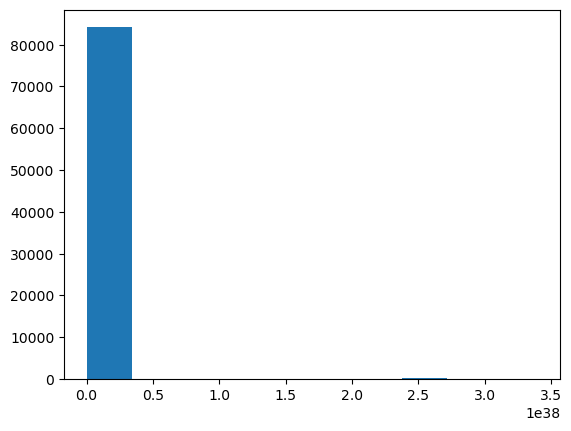

In [ ]:
a= ak.flatten(file['rec.crt_tracks.hita.t1'].array()) - ak.flatten(file['rec.crt_tracks.hita.t0'].array())
plt.hist(a[a>0])


(array([4.621e+03, 4.270e+02, 2.110e+02, 9.500e+01, 5.600e+01, 3.500e+01,
        4.100e+01, 3.000e+01, 1.900e+01, 1.600e+01, 7.000e+00, 7.000e+00,
        1.100e+01, 3.000e+00, 8.000e+00, 1.700e+01, 1.300e+01, 1.800e+01,
        1.300e+01, 1.700e+01, 1.200e+01, 2.000e+00, 2.500e+01, 3.400e+01,
        1.100e+01, 8.000e+00, 5.000e+00, 3.000e+00, 5.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 5.000e+00, 2.900e+01, 3.600e+01, 1.600e+01,
        1.000e+01, 4.000e+00]),
 array([1.00000e+00, 8.74800e+01, 1.73960e+02, 2.60440e+02, 3.46920e+02,
        4.33400e+02, 5.19880e+02, 6.06360e+02, 6.92840e+02, 7.79320e+02,
        8.65800e+02, 9.52280e+02, 1.03876e+03, 1.12524e+03, 1.21172e+03,
        1.29820e+03, 1.38468e+03, 1.47116e+03, 1.55764e+03, 1.64412e+03,
        1.73060e+03, 1.81708e+03, 1.90356e+03, 1.99004e+03, 2.07652e+03,
        2.1

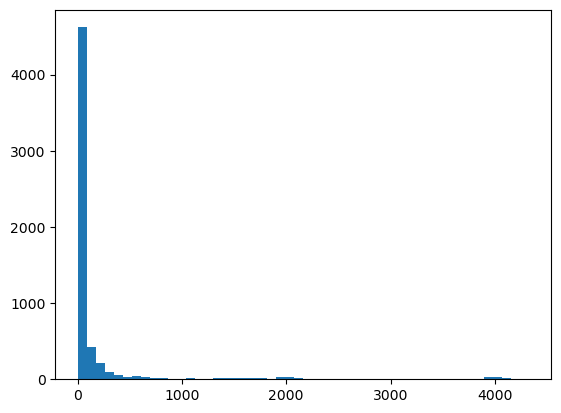

In [ ]:
plt.hist(h[h>0].flatten(), bins= 50)

<Array [[358], [247, ... 511, 294, 58.9, 91.9]] type='4816 * var * float32'>

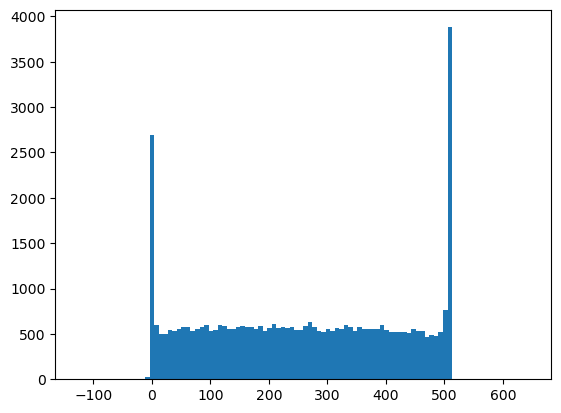

In [ ]:
plt.hist(file['rec.reco.trk.end.z'].array(library= 'pd'), bins= 100)
file['rec.reco.trk.end.z'].array()

<Array [[-204], [24.4, ... 33, -205, -107]] type='4816 * var * float32'>

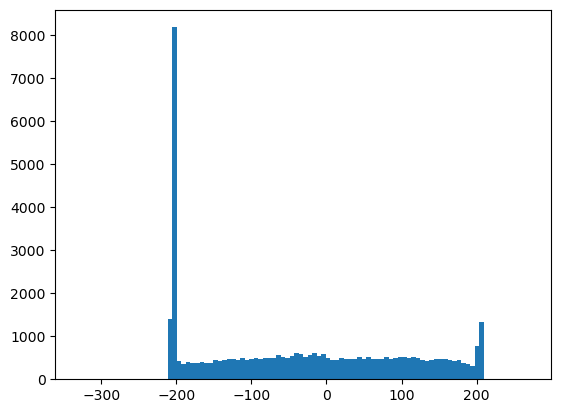

In [ ]:
plt.hist(file['rec.reco.trk.end.y'].array(library= 'pd'), bins= 100)
file['rec.reco.trk.end.y'].array()


<Array [[358], [247, ... 511, 294, 58.9, 91.9]] type='4816 * var * float32'>

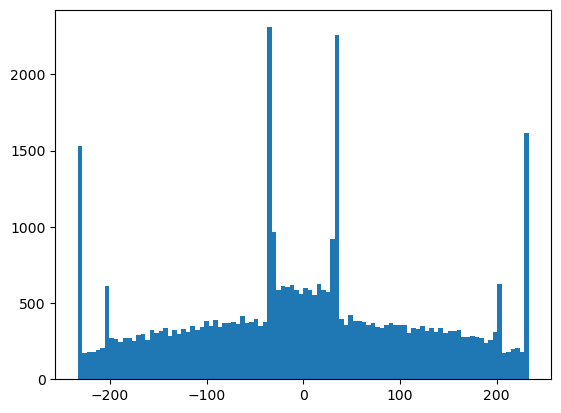

In [ ]:
plt.hist(file['rec.reco.trk.end.x'].array(library= 'pd'), bins= 100)
file['rec.reco.trk.end.z'].array()
